In [1]:
!make clean

import sys

sys.path.append('../')

from sim import Sim
from atlases import BoxAtlas
from meshes import RectangularMesh
from energies.exchange import UniformExchange
from energies.demag import Demag
from energies.zeeman import FixedZeeman
from energies.anisotropy import UniaxialAnisotropy

rm -f *.mif
rm -f *.omf


In [2]:
cmin = (0, 0, 0)
cmax = (50e-9, 1e-9, 1e-9)
d = (1e-9, 1e-9, 1e-9)

atlas = BoxAtlas(cmin, cmax)
mesh = RectangularMesh(atlas, d)

In [3]:
sim = Sim(mesh, 1e6, name='domain_wall')

In [4]:
sim.add(UniformExchange(1e-11))
sim.add(UniaxialAnisotropy(5e3, (0, 0, 1)))
sim.add(Demag())

In [5]:
def m_init(pos):
    if pos[0] > 30e-9:
        return (0, 0, 1)
    elif pos[0] < 20e-9:
        return (0, 0, -1)
    else:
        return (0, 1, 0)
    
sim.set_m(m_init)

In [6]:
sim.run_until(1e-9)

In [7]:
!ls

domain-wall.ipynb				m0file.omf
domain_wall.mif					Makefile
domain_wall.odt					standard_problem4.ipynb
domain_wall-Oxs_TimeDriver-Spin-00-0003757.omf	stdprob4relax.ipynb
fmr_standard_problem.ipynb


In [8]:
from field import Field, load_oommf_file

m0 = load_oommf_file('domain_wall-Oxs_TimeDriver-Spin-00-0003757.omf')

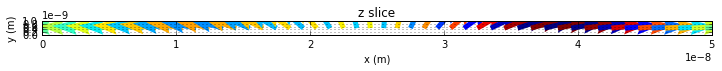

In [9]:
%matplotlib inline
m0.plot_slice('z', 1e-9)